# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
url = "https://raw.githubusercontent.com/pkk111/A-Z-Machine-Learning-Udamey/main/Machine%20Learning%20A-Z%20(Codes%20and%20Datasets)-20211027T150542Z-001/Machine%20Learning%20A-Z%20(Codes%20and%20Datasets)/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/Python/Ads_CTR_Optimisation.csv"
dataset = pd.read_csv(url)

In [3]:
print(dataset.shape)

(10000, 10)


## Implementing UCB

In [7]:
import math

N = 10000
d = 10

ads_selected = []

numbers_of_selection = [0] * d
sums_of_rewards = [0 for i in range(0, d)]

total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if numbers_of_selection[i] > 0:
      avg_reward = sums_of_rewards[i] / numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selection[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

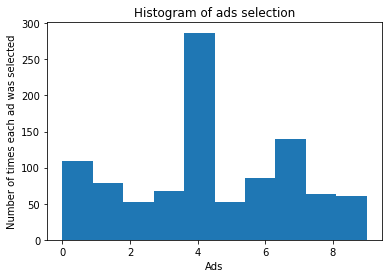

In [8]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel('Number of times each ad was selected')
plt.show()